<a href="https://colab.research.google.com/github/nhimxu00/Deep_Learning/blob/main/Age_Gender_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  ! pip install -q kaggle

In [ ]:
# from google.colab import files

In [ ]:
# files.upload()

In [ ]:
# ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 ~ /.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d jangedoo/utkface-new

In [ ]:
# ! unzip utkface-new.zip -d train

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preprocessing**

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Age_Gender_Recognition/train/UTKFace'

In [ ]:
import os

files=os.listdir(file_path)

In [ ]:
import cv2

ages=[]
genders=[]
images=[]

for ite in files:
    age=int(ite.split('_')[0])
    gender=int(ite.split('_')[1])
    total= file_path +'/'+ ite
    print(total)
    image=cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)

In [ ]:
print(len(images))

13645


In [ ]:
images[0].shape

(48, 48, 3)

In [ ]:
for item in files:
    age = int(item.split('_')[0])
    gender = int(item.split('_')[1])
    ages.append(age)
    genders.append(gender)

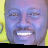

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(images[24])

In [ ]:
print(ages[24])
print(genders[24])

34
0


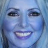

34
1


In [ ]:
cv2_imshow(images[100])
print(ages[100])
print(genders[100])

In [ ]:
import numpy as np

images_file = np.array(images)
ages_file = np.array(ages)
genders_file = np.array(genders)

print(images_file[0].shape)
print(ages_file[0].shape)

AttributeError: ignored

In [ ]:
# Lưu những giá trị của images_files vào file_path = có địa chỉ là  
# /content/drive/MyDrive/Colab Notebooks/Age_Gender_Recognition/train/UTKFace/image.npy
np.save(file_path + 'image.npy' , images_file)
np.save(file_path + 'gender.npy' , genders_file)
np.save(file_path + 'age.npy' , ages_file)

**Male = 0 , Famale = 1**

In [ ]:
genders_file

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
values, counts = np.unique(genders_file, return_counts= True)
print(counts)

[6322 7323]


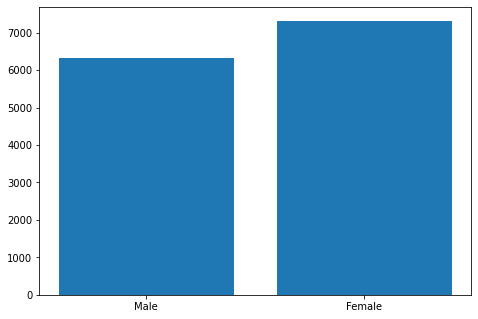

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # l, b, w, h
gender = ['Male', 'Female']
values = [6322 ,7323]
ax.bar(gender, values)
plt.show()

In [ ]:
ages_file

array([ 34,  35,  34, ...,  10,  12, 105])

In [ ]:
values, counts = np.unique(ages_file, return_counts=True)
print(counts)
print(len())

[1123  482  156   65  130   81  157  177  247  158  262   98  284  346
  395  426  859  734 2197  615  918  570  724  350  664  143  409  843
   11    2    1    5    5    1    3    4]
36


In [ ]:
val = values.tolist
cnt = counts.tolist

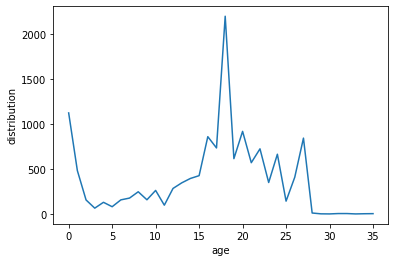

In [ ]:
plt.plot(counts)
plt.xlabel('age')
plt.ylabel('distribution')
plt.show()

In [ ]:
print(len(ages))

13645


In [ ]:
labels=[]

i = 0
while i < len(ages):
    label = []
    label.append([ages[i]])
    label.append([genders[i]])
    labels.append(label)
    i += 1

In [ ]:
print(labels)

[[[34], [1]], [[35], [0]], [[34], [0]], [[34], [0]], [[35], [0]], [[35], [0]], [[34], [0]], [[35], [0]], [[35], [0]], [[34], [1]], [[34], [1]], [[34], [1]], [[34], [0]], [[35], [0]], [[35], [0]], [[33], [1]], [[34], [1]], [[34], [1]], [[35], [0]], [[34], [1]], [[34], [1]], [[33], [1]], [[35], [0]], [[33], [1]], [[34], [0]], [[34], [1]], [[35], [0]], [[34], [0]], [[34], [0]], [[35], [0]], [[33], [1]], [[35], [0]], [[34], [1]], [[33], [1]], [[34], [0]], [[35], [0]], [[34], [0]], [[35], [0]], [[33], [1]], [[34], [0]], [[35], [0]], [[34], [0]], [[34], [0]], [[34], [0]], [[34], [0]], [[35], [0]], [[34], [0]], [[35], [0]], [[34], [0]], [[34], [1]], [[34], [0]], [[35], [0]], [[35], [0]], [[33], [1]], [[34], [0]], [[34], [1]], [[34], [0]], [[34], [1]], [[34], [0]], [[34], [0]], [[34], [0]], [[34], [1]], [[35], [0]], [[35], [0]], [[34], [1]], [[35], [0]], [[34], [1]], [[34], [0]], [[34], [0]], [[35], [0]], [[34], [0]], [[34], [1]], [[35], [0]], [[35], [0]], [[35], [0]], [[34], [0]], [[34], [0]]

In [ ]:
images_file_2 = images_file/255

In [ ]:
labels_file = np.array(labels)

In [ ]:
images_file_2.shape

(13645, 48, 48, 3)

In [ ]:
labels_file.shape

(13645, 2, 1)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(images_file_2, labels_file, test_size = 0.25)

In [ ]:
Y_train[0:5]

array([[[24],
        [ 1]],

       [[26],
        [ 1]],

       [[26],
        [ 1]],

       [[ 1],
        [ 1]],

       [[10],
        [ 0]]])

In [ ]:
Y_test[0:5]

array([[[ 1],
        [ 1]],

       [[23],
        [ 0]],

       [[ 1],
        [ 1]],

       [[26],
        [ 1]],

       [[26],
        [ 1]]])

In [ ]:
Y_train_2 = [Y_train[:,1], Y_train[:,0]]
Y_test_2  = [Y_test[:,1], Y_test[:,0]]

In [ ]:
print(Y_train.shape)
print(Y_train[:,0].shape)
print(Y_train[:,1].shape)

(10233, 2, 1)
(10233, 1)
(10233, 1)


In [ ]:
print(Y_test.shape)
print(Y_test[:,0].shape)
print(Y_test[:,1].shape)

(3412, 2, 1)
(3412, 1)
(3412, 1)


In [ ]:
Y_train_2[0][0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
Y_train_2[1][0:5]

array([[24],
       [26],
       [26],
       [ 1],
       [10]])

**Model**

In [ ]:
from tensorflow.keras.layers import Dropout , Input, Activation, Add
from tensorflow.keras.layers import Flatten, BatchNormalization, Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
def Convolution( input_tensor, filters):
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)
    return x

In [ ]:
def model(input_shape):
  inputs = Input((input_shape))
  
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model

In [ ]:
Model = model((48,48,3)) 

In [ ]:
Model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_89 (Conv2D)              (None, 48, 48, 32)   896         input_24[0][0]                   
__________________________________________________________________________________________________
dropout_134 (Dropout)           (None, 48, 48, 32)   0           conv2d_89[0][0]                  
__________________________________________________________________________________________________
activation_88 (Activation)      (None, 48, 48, 32)   0           dropout_134[0][0]                
____________________________________________________________________________________________

**Training**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
fle_s='/content/drive/MyDrive/Colab Notebooks/Age_Gender_Recognition/Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=500,callbacks=[callback_list])

Epoch 1/500
160/160 [==============================] - 2s 15ms/step - loss: 3.7450 - sex_out_loss: 0.1870 - age_out_loss: 3.1957 - sex_out_accuracy: 0.9173 - age_out_accuracy: 0.0814 - val_loss: 5.1743 - val_sex_out_loss: 0.2543 - val_age_out_loss: 4.5539 - val_sex_out_accuracy: 0.8907 - val_age_out_accuracy: 0.0850

Epoch 00001: val_loss improved from inf to 5.17429, saving model to /content/drive/MyDrive/Colab Notebooks/Age_Gender_Recognition/Age_sex_detection.h5
Epoch 2/500
160/160 [==============================] - 2s 14ms/step - loss: 3.6604 - sex_out_loss: 0.1794 - age_out_loss: 3.1118 - sex_out_accuracy: 0.9207 - age_out_accuracy: 0.0814 - val_loss: 5.3624 - val_sex_out_loss: 0.2569 - val_age_out_loss: 4.7333 - val_sex_out_accuracy: 0.8880 - val_age_out_accuracy: 0.0850

Epoch 00002: val_loss did not improve from 5.17429
Epoch 3/500
160/160 [==============================] - 2s 14ms/step - loss: 3.6965 - sex_out_loss: 0.1790 - age_out_loss: 3.1422 - sex_out_accuracy: 0.9177 - ag

**Evaluation**

In [ ]:
Model.evaluate(X_test,Y_test_2)

107/107 [==============================] - 1s 4ms/step - loss: 4.3123 - sex_out_loss: 0.3058 - age_out_loss: 3.5043 - sex_out_accuracy: 0.8751 - age_out_accuracy: 0.0850


[4.312344074249268,
 0.3058205842971802,
 3.5042836666107178,
 0.8751465678215027,
 0.08499413728713989]

In [ ]:
pred = Model.predict(X_test)

In [ ]:
pred[0]

array([[5.9830087e-01],
       [4.0529096e-03],
       [5.9830087e-01],
       ...,
       [1.2334339e-05],
       [1.8149342e-02],
       [4.2245891e-03]], dtype=float32)

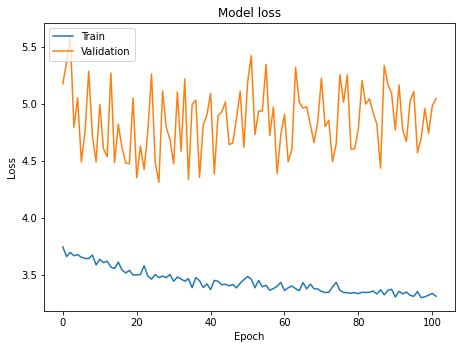

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,wspace=0.35)

**For Gender**

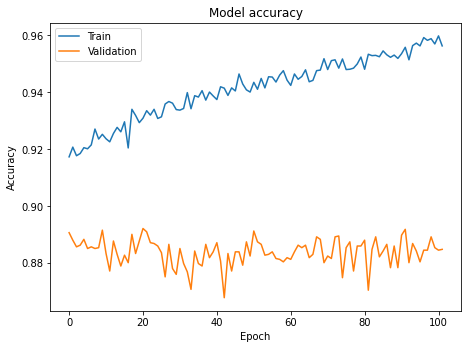

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

**For age**

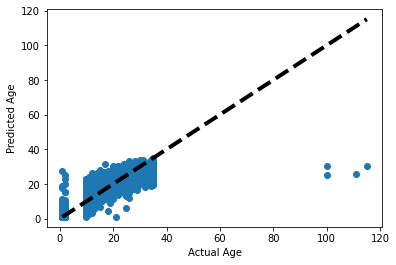

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()


For Gender

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0], Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1560
           1       0.86      0.92      0.89      1852

    accuracy                           0.88      3412
   macro avg       0.88      0.87      0.87      3412
weighted avg       0.88      0.88      0.87      3412



In [ ]:
results = confusion_matrix(Y_test_2[0], Pred_l)

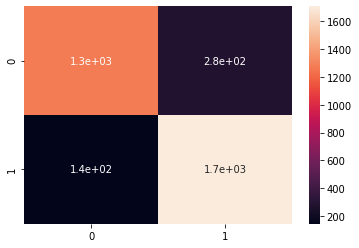

In [ ]:
import seaborn as sns

sns.heatmap(results, annot=True)

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    cv2_imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    #print(pred_1)
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age: "+ str(age))
    print("Predicted Sex: "+ sex_f[sex])

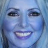

Predicted Age: 33
Predicted Sex: Female


In [ ]:
test_image(100,images_file,images_file_2,Model)

**Prediction on url**

In [ ]:
import requests
import cv2

def _downloadImage(url):
  resp = requests.get(url)
  img = np.asarray(bytearray(resp.content), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # img= cv2.resize(img,(48,48))
  return img

In [ ]:
def _predict_image(image, model):
  # Lấy kích thước 3 kênh của image
  (w, h, c) = image.shape
  # Nếu resize width = 400 thì height resize sẽ là
  height_rz = int(h*400/w)
  # Resize lại ảnh để hiện thị 
  output = cv2.resize(image, (height_rz, 400))
  # Resize lại ảnh để dự báo
  image = cv2.resize(image, IMAGE_DIMS[:2])/255.0
  # Dự báo xác suất của ảnh
  # prob = model.predict(np.expand_dims(image, axis=0))[0]
  pred_1=Model.predict(np.array([image]))
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  # Trích ra 2 xác suất cao nhất
  argmax = np.argsort(pred_1)[::-1][:1]
  # Show classes và probability ra ảnh hiển thị
  for (i, j) in enumerate(argmax):
    # popup nhãn và xác suất dự báo lên ảnh hiển thị
    label = "Age: "+ str(age) + " Sex: "+ sex_f[sex]
    cv2.putText(output, label, (5, (i * 20) + 15), 
      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (225, 0, 0), 2)
  # Hiển thị ảnh dự báo
  plt.figure(figsize=(8, 16))
  plt.axis('Off')
  plt.imshow(output)

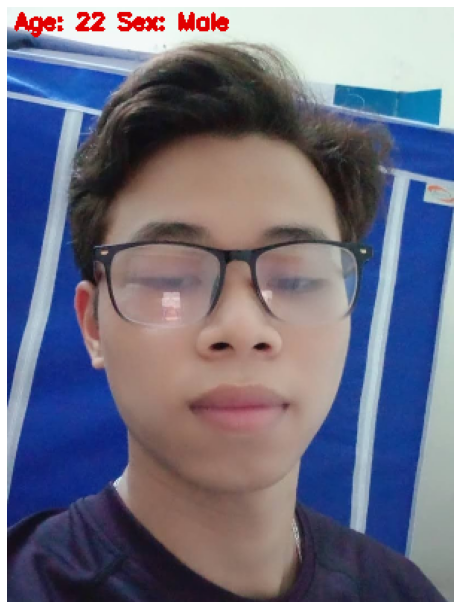

In [ ]:
url = 'https://scontent.fhan5-6.fna.fbcdn.net/v/t1.15752-9/185692973_294828608858621_1788405575473027989_n.jpg?_nc_cat=105&ccb=1-3&_nc_sid=ae9488&_nc_ohc=m0kMrlCHLm4AX9Ddkf4&_nc_ht=scontent.fhan5-6.fna&oh=be4917ebde2c3640e134a032a726f16b&oe=60C05D5F'  

IMAGE_DIMS = (48, 48, 3)

image = _downloadImage(url)
_predict_image(image, model)

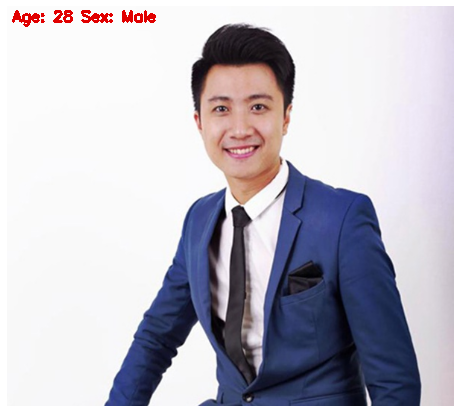

In [ ]:
url = 'https://icdn.dantri.com.vn/k:72b62a2872/2015/11/19/thay-giao1-1447903697979/the-he-8x-9x-thay-doi-hinh-anh-nguoi-lam-nghe-day-hoc.jpg'
IMAGE_DIMS = (48, 48, 3)

image = _downloadImage(url)
_predict_image(image, model)


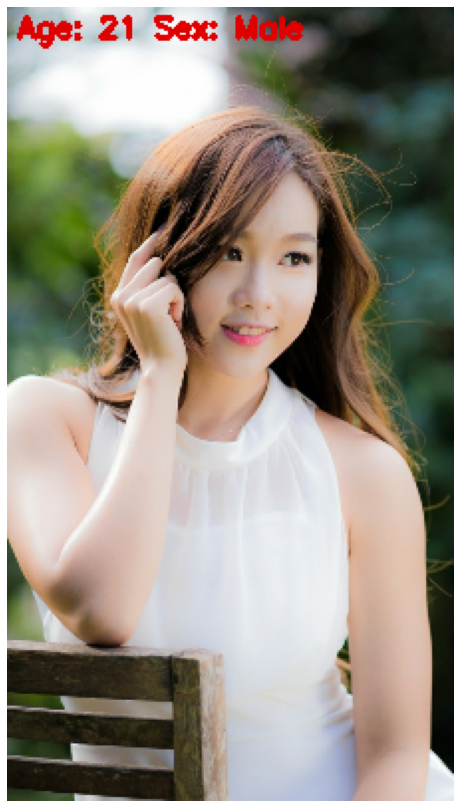

In [ ]:
url = 'https://1.bp.blogspot.com/-qD-2DuOZkQk/Xp0ZPMa6FlI/AAAAAAAAhQc/v9rFxPOZ1l8ck8RcGB38V88TvBkl7DhjwCLcBGAsYHQ/s1600/Tai-anh-nguoi-mau-dep%2B%25281%2529.jpg'
IMAGE_DIMS = (48, 48, 3)

image = _downloadImage(url)
_predict_image(image, model)